# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np

xy_data = np.load('/content/drive/My Drive/Colab Notebooks/IB-Data-Science/Exercises/Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

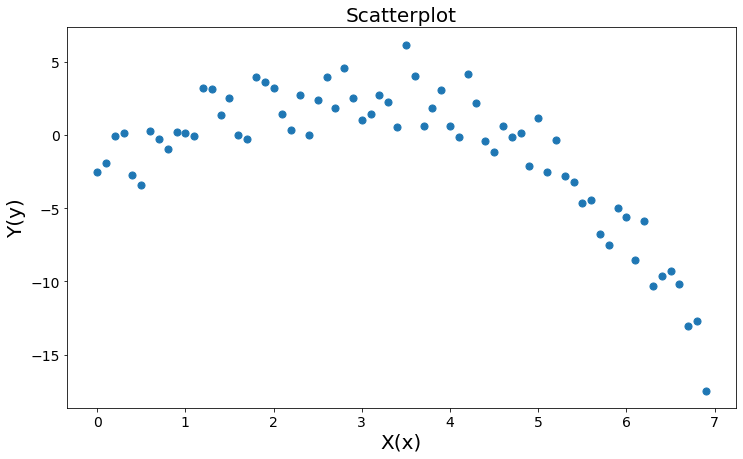

In [ ]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x = xy_data[:,0]      # First column of array (indexed by 0) contains the dates
y = xy_data[:,1]  # Second column of array (indexed by 1) contains the CO2 levels


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=50)   # s can be used to adjust the size of the dots
plt.xlabel('X(x)')
plt.ylabel('Y(y)')
plt.title('Scatterplot')
plt.savefig('xy_scatterplot.pdf', bbox_inches = 'tight')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset.
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals.

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [ ]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    N = data_matrix.shape[0]
    if k >= N:
        k = N-1
    x,y = data_matrix[:,0], data_matrix[:,1]

    x_stack = []
    for i in range(k+1):
      x_stack.append(x**i)

    X = np.column_stack((x_stack))

    XT = X.T  # transpose
    beta = np.linalg.inv(XT.dot(X)).dot(XT.dot(y))
    res = y - np.dot(X, beta)
    fit = np.dot(X, beta)

    return beta, fit, res


Use the tests below to check the outputs of the function you have written:

In [ ]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included.
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

SSE_2 =  172.18  	 MSE_2 =  2.46
SSE_3 =  152.41  	 MSE_3 =  2.18
SSE_4 =  151.23  	 MSE_4 =  2.16
R^2 for the k=2 model =  0.8876
R^2 for the k=3 model =  0.9005
R^2 for the k=4 model =  0.9013


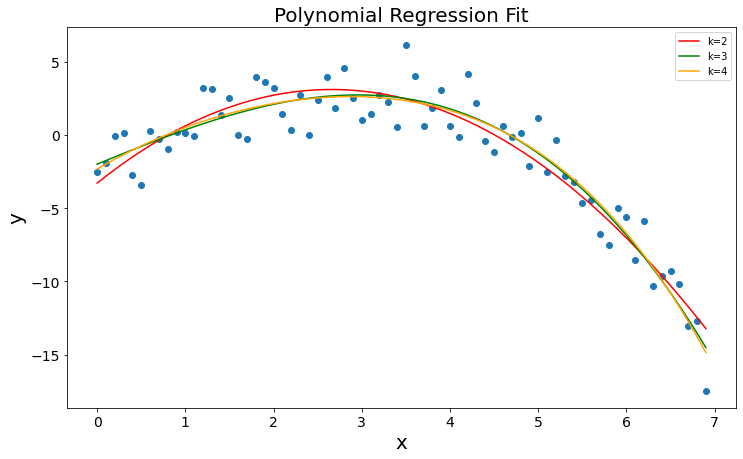

In [ ]:
#Your code here
beta_0, fit_0, res_0 = polyreg(xy_data, k=0)
beta_2, fit_2, res_2 = polyreg(xy_data, k=2)
beta_3, fit_3, res_3 = polyreg(xy_data, k=3)
beta_4, fit_4, res_4 = polyreg(xy_data, k=4)

SSE_0 = np.linalg.norm(y - fit_0)**2

SSE_2 = np.linalg.norm(y - fit_2)**2
MSE_2 = SSE_2/(np.size(y))
SSE_3 = np.linalg.norm(y - fit_3)**2
MSE_3 = SSE_3/(np.size(y))
SSE_4 = np.linalg.norm(y - fit_4)**2
MSE_4 = SSE_4/(np.size(y))

print('SSE_2 = ', np.round_(SSE_2, 2), ' \t MSE_2 = ', np.round_(MSE_2, 2))
print('SSE_3 = ', np.round_(SSE_3, 2), ' \t MSE_3 = ', np.round_(MSE_3, 2))
print('SSE_4 = ', np.round_(SSE_4, 2), ' \t MSE_4 = ', np.round_(MSE_4, 2))
print('R^2 for the k=2 model = ', np.round_(1- SSE_2/SSE_0, decimals = 4))
print('R^2 for the k=3 model = ', np.round_(1- SSE_3/SSE_0, decimals = 4))
print('R^2 for the k=4 model = ', np.round_(1- SSE_4/SSE_0, decimals = 4))

plt.scatter(xy_data[:,0], xy_data[:,1])
plt.plot(xy_data[:,0], fit_2, color='red', label='k=2')
plt.plot(xy_data[:,0], fit_3, color='green', label='k=3')
plt.plot(xy_data[:,0], fit_4, color='orange', label='k=4')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


 #### State which model you choose and briefly justify your choice.


 - K=4 shows the best fit as the R^2 value for k=4 is the cloest value to one.


### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot.
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

Mean of residuals for quadratic model =  0.0 Variance of residuals =  2.46


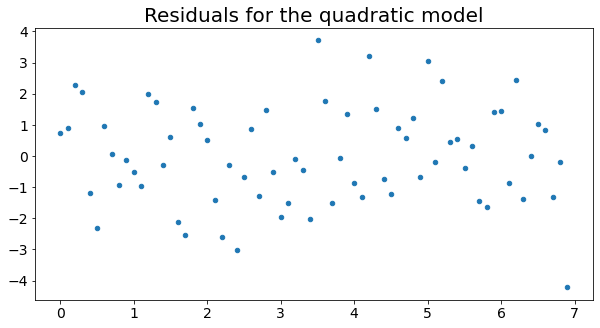

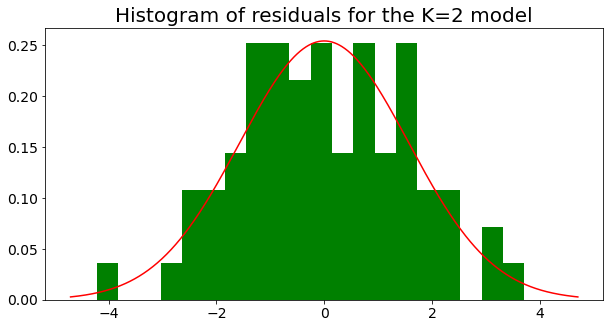

In [ ]:
#HERE USING K=2

# Computing the residuals
from scipy.stats import norm
print('Mean of residuals for quadratic model = ', np.round(np.mean(res_2), 3),
      'Variance of residuals = ', np.round(np.var(res_2),3))

x = xy_data[:,0]
plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x, res_2, s=20)
plt.title('Residuals for the quadratic model')
plt.savefig('quad_resid.png', bbox_inches = 'tight')
plt.show()

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(res_2, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_2_stdev = np.std(res_2)  #standard deviation of residuals
xvals = np.linspace(-3*res_2_stdev,3*res_2_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_2_stdev), 'r')
plt.title('Histogram of residuals for the K=2 model')
plt.show()
